In [ ]:
install.packages("GLMsData")
library(GLMsData)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Tập trung chủ yếu vào việc nghiên cứu các biến liên tục và dương --> có các phân phối lệch phải

Mô tả về loại dữ liệu sử dụng trong chương:
là về loại cây chanh lá nhỏ ở Nga.

dữ liệu gồm 4 thành phần:
- Foliage --> chế phẩm từ lá chanh (kg) --> biến response
- DBH --> đường kính của cây tính ngang đầu người (cm) --> biến explanatory 
- Age --> tuổi của cây (year) --> biến explanatory
- Origin --> nguồn gốc của cây --> biến dạng factor  --> biến explanatory

foliage chủ yếu phát triển bên tán ngoài, tán ngoài lại có tỷ lệ với đường kính tán cây --> tìm sự 
tìm mối quan hệ giữa Foliage và được kính của cây

$
log(y) \approx log(\pi) + 2log(d)
$

In [ ]:
data(lime)
str(lime)

'data.frame':	385 obs. of  4 variables:
 $ Foliage: num  0.1 0.2 0.4 0.6 0.6 0.8 1 1.4 1.7 3.5 ...
 $ DBH    : num  4 6 8 9.6 11.3 13.7 15.4 17.8 18 22 ...
 $ Age    : int  38 38 46 44 60 56 72 74 68 79 ...
 $ Origin : Factor w/ 3 levels "Coppice","Natural",..: 2 2 2 2 2 2 2 2 2 2 ...


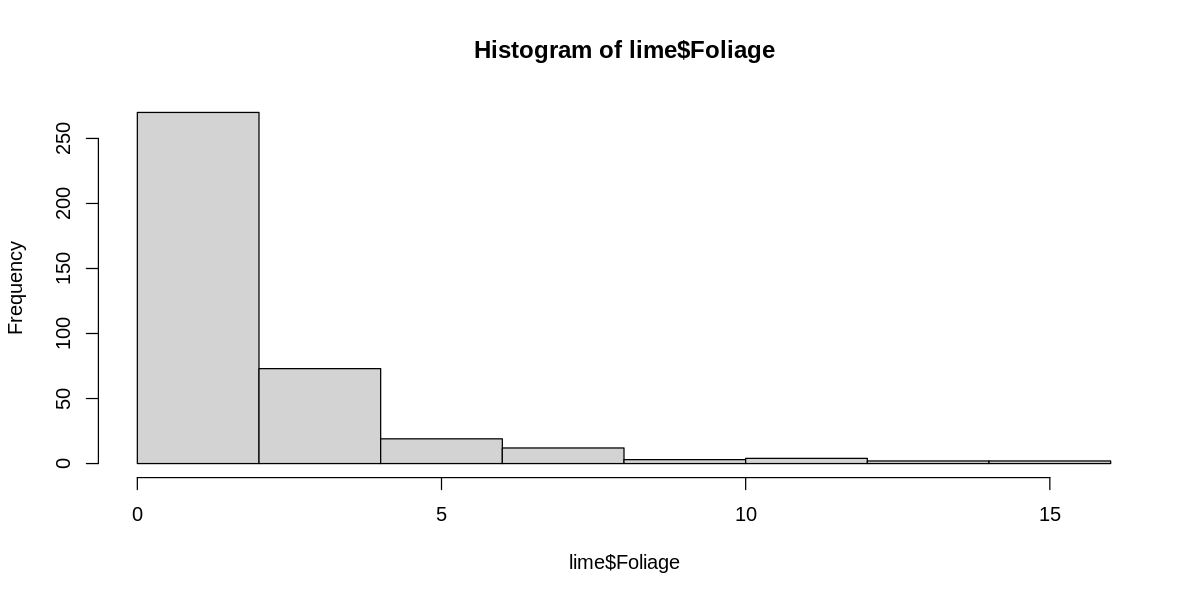

In [ ]:
hist(lime$Foliage)

In [ ]:
summary(lime)

    Foliage            DBH             Age             Origin   
 Min.   : 0.010   Min.   : 1.60   Min.   : 10.00   Coppice:133  
 1st Qu.: 0.440   1st Qu.:10.20   1st Qu.: 32.00   Natural:185  
 Median : 1.060   Median :15.80   Median : 46.00   Planted: 67  
 Mean   : 1.872   Mean   :16.33   Mean   : 49.55                
 3rd Qu.: 2.340   3rd Qu.:21.70   3rd Qu.: 66.00                
 Max.   :14.080   Max.   :38.90   Max.   :141.00                

In [ ]:
# lime


Hàm mật độ xác suất của Gamma

$
P(y;\alpha,\beta) = \frac{y^{\alpha - 1}e^{\frac{-y}{\beta}}}{\Gamma(\alpha)\beta^\alpha}
$

Sau biến đổi:

$
P(y;\mu,\phi) = {\frac{y}{\phi\mu}}^{1/\phi} \frac{1}{y} e^{\frac{-y}{\phi\mu}}\frac{1}{\Gamma({1/\phi})}
$

với 

$ 
\alpha = {1/\phi} 
$

$
\beta = \mu\phi
$

general form Gamma GLM:

$
\left\{
\begin{array}{cc}
y \approx \Gamma(\mu)\\
g(\mu) =  \beta_0 + \sum{\beta_jx_j}
\end{array}
\right.
$

ERROR: ignored

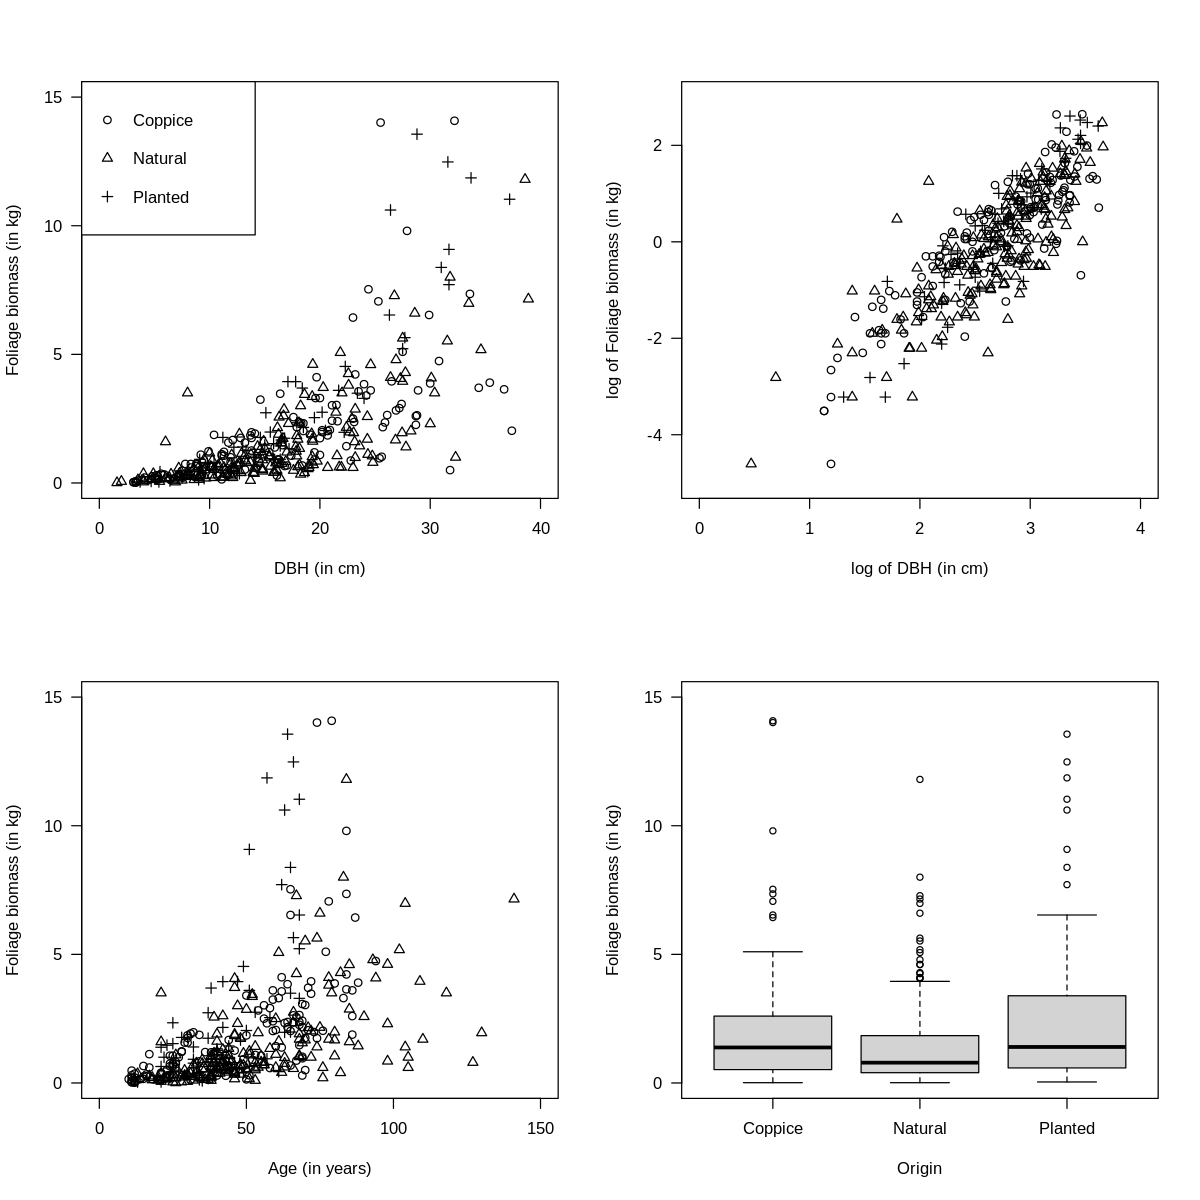

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(2,2))
plot(Foliage ~ DBH, type="n", las=1, xlab="DBH (in cm)", ylab="Foliage biomass (in kg)", ylim = c(0, 15), xlim=c(0, 40), data=lime)
points(Foliage ~ DBH, data=subset(lime, Origin=="Coppice"),pch=1)
points(Foliage ~ DBH, data=subset(lime, Origin=="Natural"),pch=2)
points(Foliage ~ DBH, data=subset(lime, Origin=="Planted"),pch=3)
legend("topleft", pch=c(1, 2, 3), legend=c("Coppice", "Natural","Planted"))

plot( log(Foliage) ~ log(DBH), type="n", las=1, xlab="log of DBH (in cm)", ylab="log of Foliage biomass (in kg)", ylim = c(-5, 3), xlim=c(0, 4), data=lime)
points( log(Foliage) ~ log(DBH), data=subset(lime, Origin=="Coppice"), pch=1)
points( log(Foliage) ~ log(DBH), data=subset(lime, Origin=="Natural"), pch=2)
points( log(Foliage) ~ log(DBH), data=subset(lime, Origin=="Planted"), pch=3)

plot(Foliage ~ Age, type="n", las=1, xlab="Age (in years)", ylab="Foliage biomass (in kg)", ylim = c(0, 15), xlim=c(0, 150), data=lime)

points(Foliage ~ Age, data=subset(lime, Origin=="Coppice"), pch=1)
points(Foliage ~ Age, data=subset(lime, Origin=="Natural"), pch=2)
points(Foliage ~ Age, data=subset(lime, Origin=="Planted"), pch=3)

plot( Foliage ~ Origin, data=lime, ylim=c(0, 15), las=1, ylab="Foliage biomass (in kg)")

(Intercept)  c(log(mn)) 
  -0.165002    1.706453

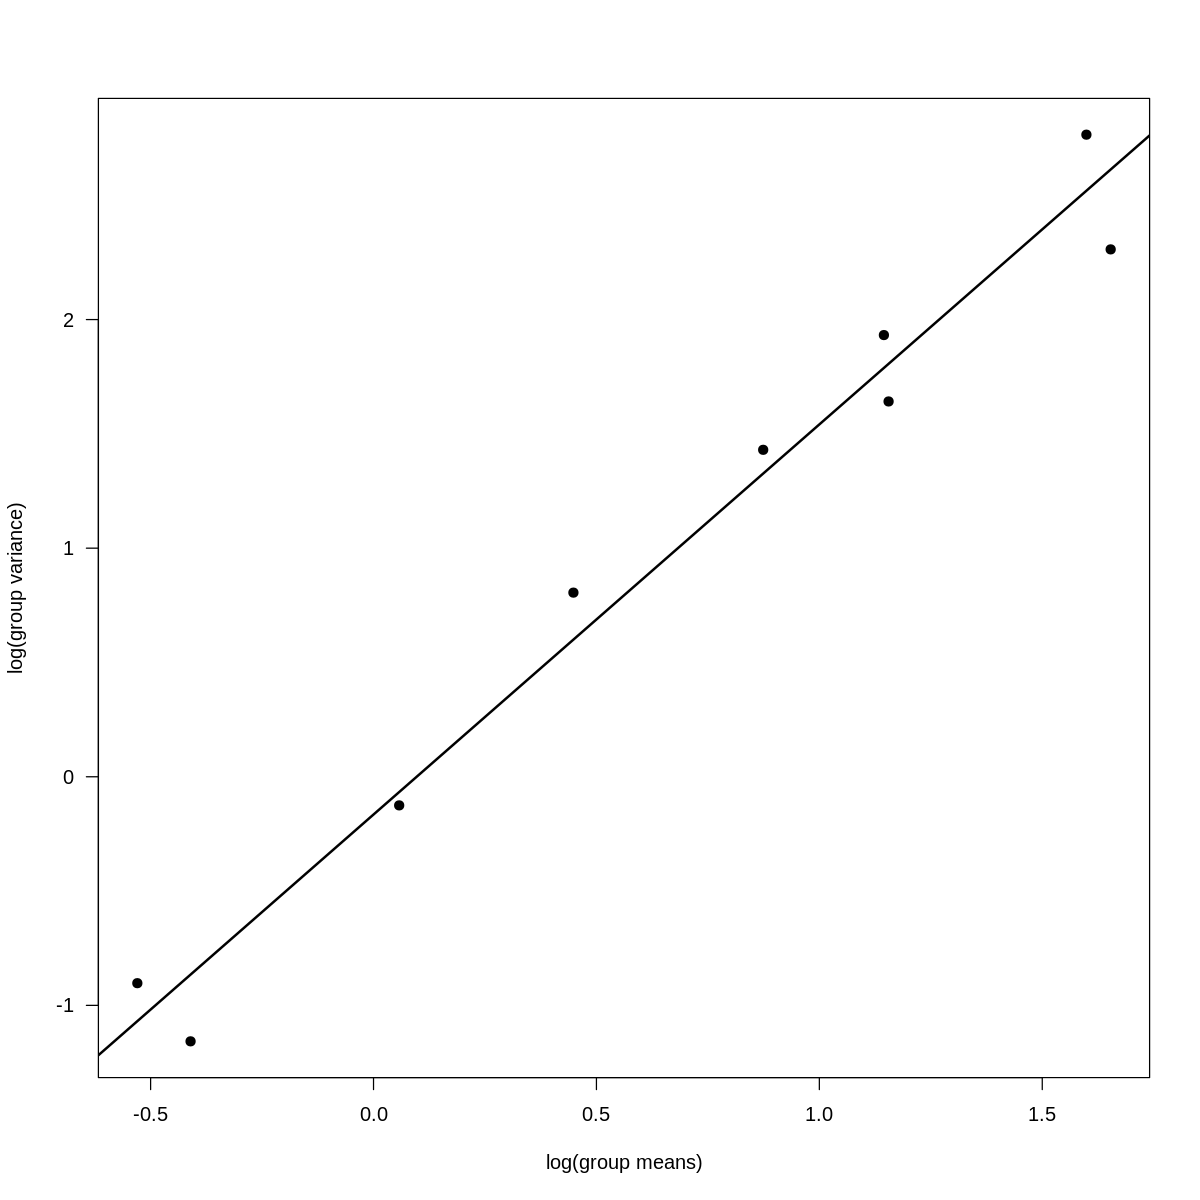

In [ ]:
lime$AgeGrp <- cut(lime$Age, breaks=4 )
# lime$AgeGrp
vr <- with( lime, tapply(Foliage, list(AgeGrp, Origin), "var" ) )
# vr
mn <- with( lime, tapply(Foliage, list(AgeGrp, Origin), "mean" ) )
# mn

plot( log(vr) ~ log(mn), las=1, pch=19, xlab="log(group means)", ylab="log(group variance)")
mf.lm <- lm( c(log(vr)) ~ c(log(mn)) )

coef( mf.lm )

abline( coef( mf.lm ), lwd=2)

Khi ta lấy group Age lại và tính log của variance và mean ta tính được hệ số tuyến tính giữa chúng là xấp xỉ 2

$
log(var) \approx 2log(mean)
$

$
V(\mu) \approx \mu^2
$

hàm phân bố xác suất của Gaussian nghịch đảo

$
P(y;\mu,\phi) = (2\pi y^3\phi)^{-1/2}e^{-\frac{1}{2\phi}\frac{(y - \mu)^2}{y\mu^2}}
$

$
\left\{
\begin{array}{cc}
y \approx \Gamma(\mu)\\
g(\mu) =  \beta_0 + \sum{\beta_jx_j}
\end{array}
\right.
$

ta có deviance của phân phối gamma

$
d(y, \mu) = 2 \left\{ - log{}\frac{y}{\mu} + \frac{y - \mu}{\mu}
  \right\}
$

Residual deviance

$
D(y, \hat\mu) = \displaystyle\sum_{i = 1}^nw_id(y_i,\hat\mu_i) \approx \chi^2_{n - p'}
$

phân phối gamma thường được sử dụng để diễn tả thời gian giữa của phân phối Poisson

poisson: số sự kiện xảy ra trong khoản thời gian từ 0 tới T

gamma: khoảng thời gian y cân để r sự kiện xảy ra

In [ ]:
lime.log <- glm( Foliage ~ Origin * log(DBH), family=Gamma(link="log"),data=lime)
lime.log


Call:  glm(formula = Foliage ~ Origin * log(DBH), family = Gamma(link = "log"), 
    data = lime)

Coefficients:
           (Intercept)           OriginNatural           OriginPlanted  
               -4.6289                  0.3245                 -1.5285  
              log(DBH)  OriginNatural:log(DBH)  OriginPlanted:log(DBH)  
                1.8432                 -0.2040                  0.5768  

Degrees of Freedom: 384 Total (i.e. Null);  379 Residual
Null Deviance:	    508.5 
Residual Deviance: 152.7 	AIC: 750.3

In [ ]:
summary(lime.log)


Call:
glm(formula = Foliage ~ Origin * log(DBH), family = Gamma(link = "log"), 
    data = lime)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7480  -0.5354  -0.1509   0.2528   3.2938  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -4.6289     0.2756 -16.793  < 2e-16 ***
OriginNatural            0.3245     0.3882   0.836  0.40371    
OriginPlanted           -1.5285     0.5727  -2.669  0.00793 ** 
log(DBH)                 1.8432     0.1016  18.149  < 2e-16 ***
OriginNatural:log(DBH)  -0.2040     0.1433  -1.424  0.15536    
OriginPlanted:log(DBH)   0.5768     0.2093   2.755  0.00614 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.5443774)

    Null deviance: 508.48  on 384  degrees of freedom
Residual deviance: 152.69  on 379  degrees of freedom
AIC: 750.33

Number of Fisher Scoring iterations: 6


In [ ]:
# lime.inv <- update(lime.log, family=Gamma(link="inverse") )

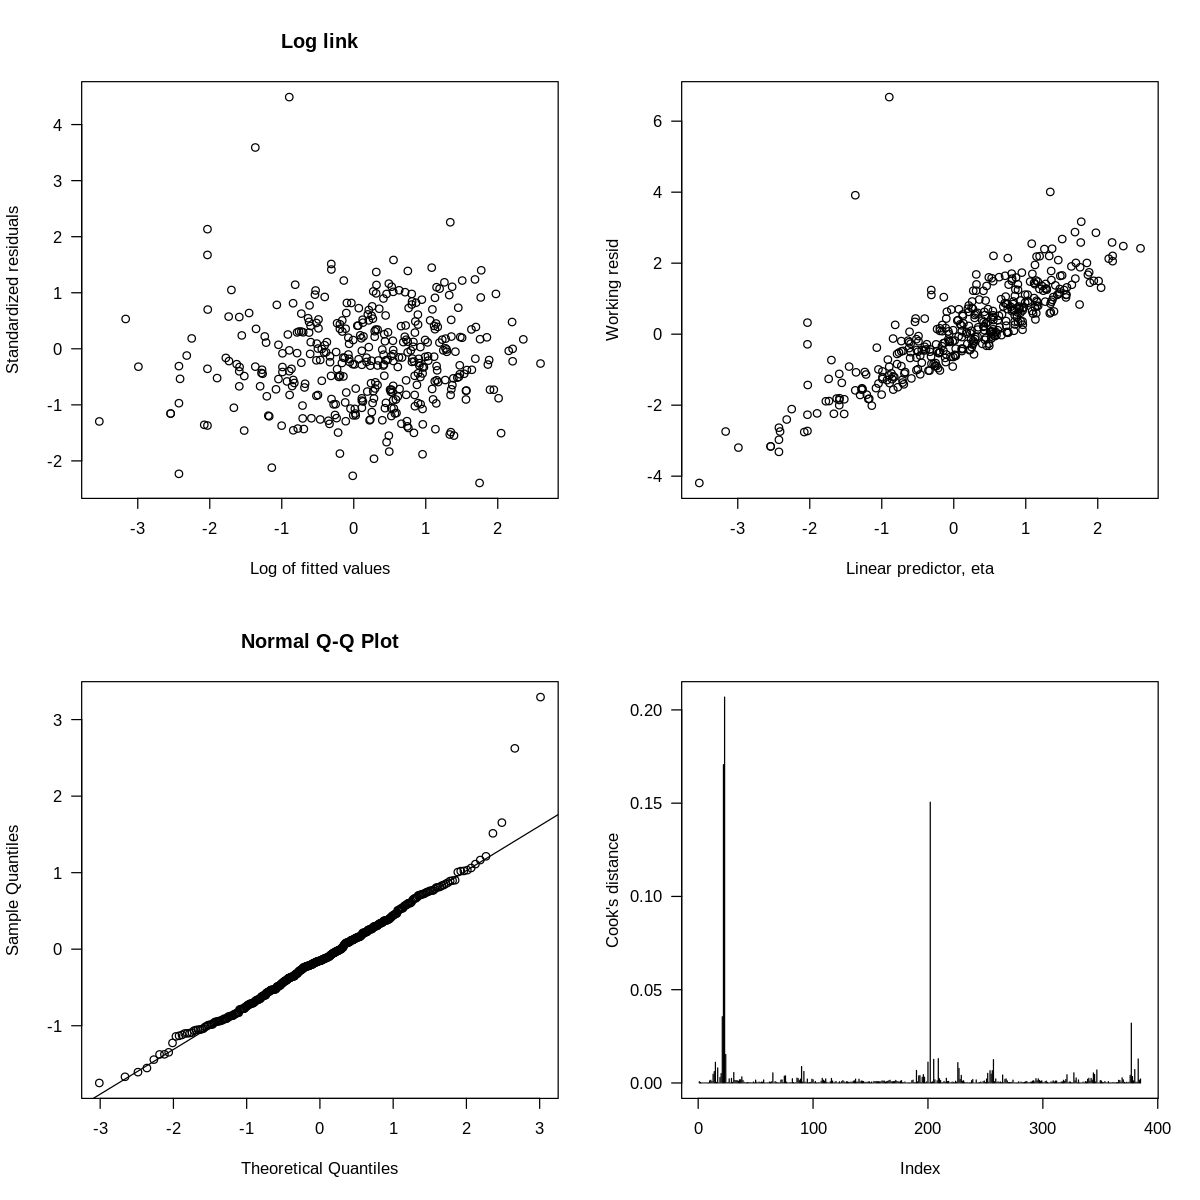

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(2,2))

plot(rstandard(lime.log) ~ log(fitted(lime.log)), main="Log link", las=1, xlab="Log of fitted values", ylab="Standardized residuals")
eta.log <- lime.log$linear.predictor
plot(resid(lime.log, type="working") + eta.log ~ eta.log, las=1, ylab="Working resid", xlab="Linear predictor, eta")
qqnorm( qr1 <- resid(lime.log), las=1 )
# qr1
qqline( qr1 )
plot( cooks.distance(lime.log), ylab="Cook's distance", las=1, type="h")

MLE - page 169 - 4.2.4

https://dominhhai.github.io/vi/2017/10/sampling-parameters-estimation/

Khai trienr log likelihood của hàm mật độ phân phối của phân phối chuẩn --> phụ thuộc và RSS( tổng bình phương phần dư)
tìm max likelihood thực chất là tìm min của RSS --> chính là tìm bình phương nhỏ nhất trong phân phối chuẩn --> đây là trường hợp đặc biệt

ước lượng tham số $\phi$ sao cho đầu ra của mô hình gần với tập mẫu nhất.

hàm likelihood thực chất là tích của hàm mật độ xác suất với X phân bố liên tục và hàm trọng lượng xác suất với phân bố rời rạc

chuẩn sang log để tránh sai số  chuyển phép nhân thành phép cộng mà tham số $\phi$ không bị ảnh hưởng

Hàm mật độ xác suất của Gamma

$
P(y;\alpha,\beta) = \frac{y^{\alpha - 1}e^{\frac{-y}{\beta}}}{\Gamma(\alpha)\beta^\alpha}
$

Sau biến đổi:

$
P(y;\mu,\phi) = {\frac{y}{\phi\mu}}^{1/\phi} \frac{1}{y} e^{\frac{-y}{\phi\mu}}\frac{1}{\Gamma({1/\phi})}
$

với 

$ 
\alpha = {1/\phi} 
$

$
\beta = \mu\phi
$

general form Gamma GLM:

$
\left\{
\begin{array}{cc}
y \approx \Gamma(\mu)\\
V(\mu) = \mu^2
\end{array}
\right.
$

deviance của gaussian nghịch đảo:

$
d(y,\mu) = \frac{(y-\mu)^2}{y\mu^2}
$

Residual deviance

$
D(y, \hat\mu) = \displaystyle\sum_{i = 1}^nw_id(y_i,\hat\mu_i) \approx \chi^2_{n - p'}
$

check bảng 5.1 trang 221

$\phi$ không biết --> đi ước lượng

Gaussian nghịch đảo: phân phối thời gian tới các điểm có khoảng cách $\delta$ với vị trí cố định

Gaussian: phân bố khoảng cách từ vị trí đầu tới 1 vị trí bất kỳ trong khoảng thời gian cố định


In [ ]:
colSums(influence.measures(lime.log)$is.inf)

dfb.1_ dfb.OrgN dfb.OrgP dfb.l(DB dfb.ON:( dfb.OP:(    dffit    cov.r 
       0        0        0        0        0        0        7       29 
  cook.d      hat 
       0       18

In [ ]:
df.residual(lime.log)

[1] 379

In [ ]:
deviance(lime.log)

[1] 152.6895

In [ ]:
summary( lime.log )


Call:
glm(formula = Foliage ~ Origin * log(DBH), family = Gamma(link = "log"), 
    data = lime)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7480  -0.5354  -0.1509   0.2528   3.2938  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -4.6289     0.2756 -16.793  < 2e-16 ***
OriginNatural            0.3245     0.3882   0.836  0.40371    
OriginPlanted           -1.5285     0.5727  -2.669  0.00793 ** 
log(DBH)                 1.8432     0.1016  18.149  < 2e-16 ***
OriginNatural:log(DBH)  -0.2040     0.1433  -1.424  0.15536    
OriginPlanted:log(DBH)   0.5768     0.2093   2.755  0.00614 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.5443774)

    Null deviance: 508.48  on 384  degrees of freedom
Residual deviance: 152.69  on 379  degrees of freedom
AIC: 750.33

Number of Fisher Scoring iterations: 6


In [ ]:
phi.md <- deviance(lime.log)/df.residual(lime.log)

In [ ]:
deviance(lime.log)

[1] 152.6895

In [ ]:
phi.pearson <- summary( lime.log )$dispersion
c( "Mean Deviance"=phi.md, "Pearson"=phi.pearson)

Mean Deviance       Pearson 
    0.4028747     0.5443774

In [ ]:
round(anova(lime.log, test="F"), 8)

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NULL,NA,NA,384,508.4806,NA,NA
Origin,2,19.894208,382,488.5864,18.27244,3.000e-08
log(DBH),1,328.006627,381,160.5798,602.53532,0.000e+00
Origin:log(DBH),2,7.890304,379,152.6895,7.24709,8.153e-04


In [ ]:
round(anova(lime.log,test="F", dispersion=phi.md), 8)

Warning message in anova.glm(lime.log, test = "F", dispersion = phi.md):
“using F test with a fixed dispersion is inappropriate”


,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NULL,NA,NA,384,508.4806,NA,NA
Origin,2,19.894208,382,488.5864,24.690319,0.000e+00
log(DBH),1,328.006627,381,160.5798,814.165443,0.000e+00
Origin:log(DBH),2,7.890304,379,152.6895,9.792505,5.587e-05


In [ ]:
printCoefmat(coef(summary(lime.log)), 3)

                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -4.629      0.276  -16.79   <2e-16 ***
OriginNatural             0.325      0.388    0.84   0.4037    
OriginPlanted            -1.528      0.573   -2.67   0.0079 ** 
log(DBH)                  1.843      0.102   18.15   <2e-16 ***
OriginNatural:log(DBH)   -0.204      0.143   -1.42   0.1554    
OriginPlanted:log(DBH)    0.577      0.209    2.76   0.0061 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


hệ số của DBH gần xấp xỉ với giá trị dữ liệu đầu bài --> có thể tiến hành kiếm định

In [ ]:
lime.iG <- glm( Foliage ~ Origin * log(DBH), family=inverse.gaussian(link="log"), data=lime)
lime.iG


Call:  glm(formula = Foliage ~ Origin * log(DBH), family = inverse.gaussian(link = "log"), 
    data = lime)

Coefficients:
           (Intercept)           OriginNatural           OriginPlanted  
              -5.74773                 1.33843                -0.47883  
              log(DBH)  OriginNatural:log(DBH)  OriginPlanted:log(DBH)  
               2.39082                -0.69024                 0.06722  

Degrees of Freedom: 384 Total (i.e. Null);  379 Residual
Null Deviance:	    873.6 
Residual Deviance: 406.8 	AIC: 1090

In [ ]:
phi.iG.mle <- deviance(lime.iG)/length(lime$Foliage)
deviance(lime.iG)
length(lime$Foliage)

[1] 406.8136

[1] 385

In [ ]:
phi.iG.md <- deviance(lime.iG)/df.residual(lime.iG)
df.residual(lime.iG)

[1] 379

In [ ]:
phi.iG.pearson <- summary( lime.iG )$dispersion
summary( lime.iG )


Call:
glm(formula = Foliage ~ Origin * log(DBH), family = inverse.gaussian(link = "log"), 
    data = lime)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.1948  -0.6164  -0.2181   0.0980   4.1490  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -5.74773    0.22216 -25.872  < 2e-16 ***
OriginNatural           1.33843    0.27352   4.893 1.47e-06 ***
OriginPlanted          -0.47883    0.47870  -1.000    0.318    
log(DBH)                2.39082    0.12921  18.503  < 2e-16 ***
OriginNatural:log(DBH) -0.69024    0.15128  -4.563 6.84e-06 ***
OriginPlanted:log(DBH)  0.06722    0.24317   0.276    0.782    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for inverse.gaussian family taken to be 1.255992)

    Null deviance: 873.60  on 384  degrees of freedom
Residual deviance: 406.81  on 379  degrees of freedom
AIC: 1089.5

Number of Fisher Scoring iterations: 6


In [ ]:
c( "MLE"=phi.iG.mle, "Mean dev."=phi.iG.md, "Pearson"=phi.iG.pearson)

MLE Mean dev.   Pearson 
 1.056659  1.073387  1.255992

In [ ]:
c( "Gamma:"=AIC(lime.log), "inv. Gauss.:"=AIC(lime.iG) )

Gamma: inv. Gauss.: 
    750.3267    1089.5297

đo tấm vật liệu xây dưng độ thấm của 3 tấm trên 3 máy khác nhau trong 9 ngày, tổng cộng có 81 tấm.

mỗi phép đo là độ thấm trung bình của 8 tấm ngẫu nhiên được cắt ra từ mỗi tấm trong 81 tấm

In [ ]:
data(perm); perm$Day <- factor(perm$Day)
summary(perm) 

      Day     Mach        Perm       
 1      : 9   A:27   Min.   : 11.67  
 2      : 9   B:27   1st Qu.: 24.66  
 3      : 9   C:27   Median : 34.67  
 4      : 9          Mean   : 43.16  
 5      : 9          3rd Qu.: 50.58  
 6      : 9          Max.   :177.01  
 (Other):27                          

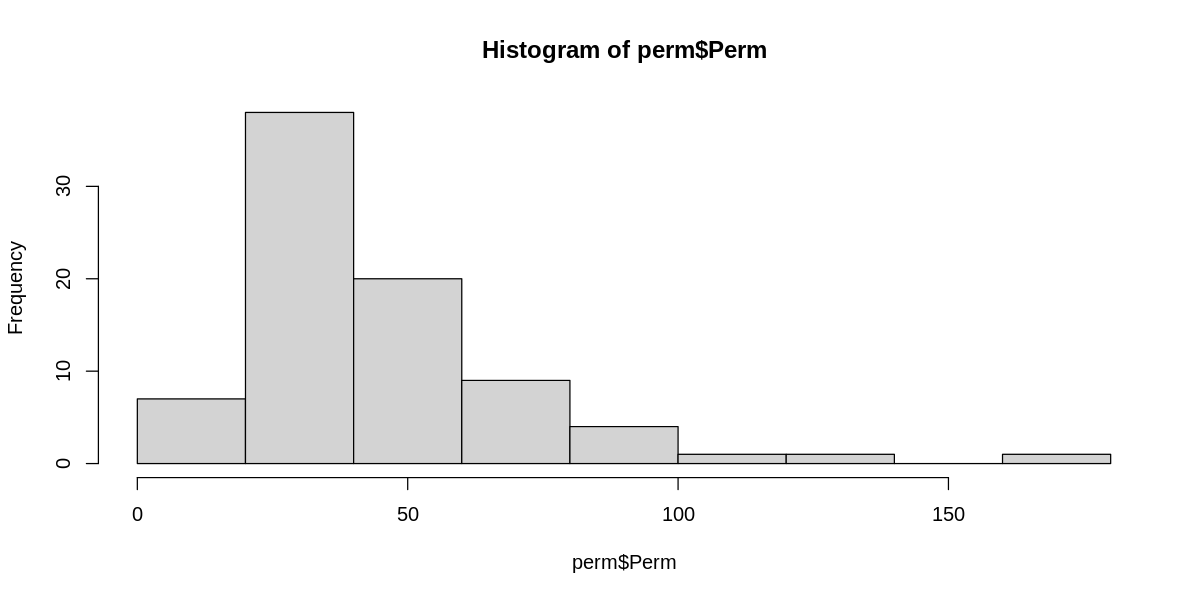

In [ ]:
hist(perm$Perm)

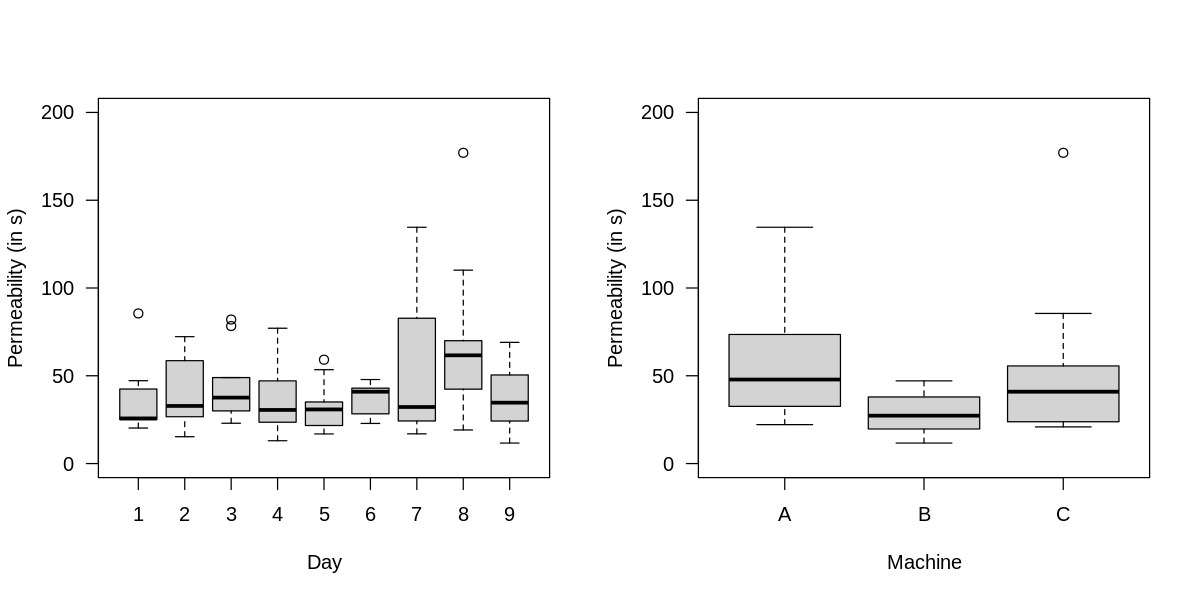

In [ ]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2))
boxplot( Perm ~ Day, data=perm, las=1, ylim=c(0, 200), xlab="Day", ylab="Permeability (in s)")
boxplot( Perm ~ Mach, data=perm, las=1, ylim=c(0, 200), xlab="Machine", ylab="Permeability (in s)")

In [ ]:
perm.log <- glm( Perm ~ Mach * Day, data=perm, family=inverse.gaussian(link="log") )
round( anova( perm.log, test="F"), 5)

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NULL,NA,NA,80,0.61746,NA,NA
Mach,2,0.14045,78,0.47701,14.13283,0.00001
Day,8,0.06946,70,0.40755,1.74735,0.10850
Mach:Day,16,0.10990,54,0.29765,1.38237,0.18580


In [ ]:
perm.log <- update( perm.log, Perm ~ Mach)
perm.log


Call:  glm(formula = Perm ~ Mach, family = inverse.gaussian(link = "log"), 
    data = perm)

Coefficients:
(Intercept)        MachB        MachC  
     4.0011      -0.6390      -0.1729  

Degrees of Freedom: 80 Total (i.e. Null);  78 Residual
Null Deviance:	    0.6175 
Residual Deviance: 0.477 	AIC: 699.9

In [ ]:
tapply( perm$Perm, perm$Mach, "mean")

A        B        C 
54.65704 28.84963 45.98037

In [ ]:
tapply( fitted(perm.log), perm$Mach, "mean")

A        B        C 
54.65704 28.84963 45.98037

In [ ]:
printCoefmat(coef(summary(perm.log)))

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  4.00108    0.11694 34.2137 < 2.2e-16 ***
MachB       -0.63898    0.14455 -4.4205 3.144e-05 ***
MachC       -0.17286    0.15868 -1.0894    0.2794    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


model đưa ra gợi ý là sử dụng máy B để đo độ thấm do 

máy B chỉ bằng $e^{-0.6390}$ của máy A

máy C bằng $e^{-0.1729}$ của máy A

Case study 2:
năng suất trồng giống hành tây lai

sản lượng là trung bình trên mỗi cây
mật độ trên mỗi foot vuông
sản lương là trung bình quá 3 cây, tính trung bình theo thang log-scale


Dữ liệu nghịch đảo --> inverse Gaussian

z: năng suất của mỗi cây

x: mật độ cây trồng

y: năng suất của mỗi đơn vị đất

In [ ]:
data(yieldden); yieldden$Var <- factor(yieldden$Var)
yieldden$YD <- with(yieldden, Yield * Dens )
summary(yieldden)

     Yield             Dens        Var          YD       
 Min.   : 16.30   Min.   : 2.140   1:10   Min.   :281.6  
 1st Qu.: 25.95   1st Qu.: 4.647   2:10   1st Qu.:335.7  
 Median : 48.20   Median : 8.695   3:10   Median :418.6  
 Mean   : 54.71   Mean   :12.344          Mean   :423.2  
 3rd Qu.: 72.58   3rd Qu.:18.483          3rd Qu.:509.6  
 Max.   :131.60   Max.   :31.080          Max.   :598.4  

In [ ]:
str(yieldden)

'data.frame':	30 obs. of  4 variables:
 $ Yield: num  105.6 89.4 71 60.3 47.6 ...
 $ Dens : num  3.07 3.31 5.97 6.99 8.67 ...
 $ Var  : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ YD   : num  324 296 424 421 413 ...


In [ ]:
# options(repr.plot.width=10, repr.plot.height=10)
# par(mfrow=c(2,2))
# plot(Yield ~ Dens, type="n", las=1, xlab="Planting density (plants/sq. feet), x", ylab="Mean yield/plant (g/plant), z", ylim = c(0, 120, xlim=c(0, 30), data=yieldden)
# points(Yield ~ Dens, data=subset(yieldden, Origin=="1"),pch=1)
# points(Yield ~ Dens, data=subset(yieldden, Origin=="2"),pch=2)
# points(Yield ~ Dens, data=subset(yieldden, Origin=="3"),pch=3)
# legend("topleft", pch=c(1, 2, 3), legend=c("Var. 1", "Var. 2","Var. 3"))

ERROR: ignored

In [ ]:
yd.glm.int <- glm( YD ~ (Dens + I(1/Dens)) * Var, family=Gamma(link=inverse), data=yieldden )
summary(yd.glm.int)


Call:
glm(formula = YD ~ (Dens + I(1/Dens)) * Var, family = Gamma(link = inverse), 
    data = yieldden)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.136573  -0.041790   0.009643   0.033426   0.134434  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.783e-03  2.447e-04   7.288 3.55e-07 ***
Dens           -7.358e-06  8.673e-06  -0.848 0.405768    
I(1/Dens)       4.562e-03  1.046e-03   4.359 0.000275 ***
Var2            1.992e-04  3.448e-04   0.578 0.569649    
Var3            5.820e-04  3.586e-04   1.623 0.119466    
Dens:Var2       1.223e-06  1.423e-05   0.086 0.932294    
Dens:Var3      -1.147e-05  1.320e-05  -0.869 0.394716    
I(1/Dens):Var2 -9.722e-04  1.312e-03  -0.741 0.466885    
I(1/Dens):Var3 -1.463e-03  1.442e-03  -1.015 0.321720    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.005236209)

    Null deviance: 1.45121  on 2

In [ ]:
round( anova( yd.glm.int, test="F"), 5)

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NULL,NA,NA,29,1.45121,NA,NA
Dens,1,1.00362,28,0.44759,191.66926,0.00000
I(1/Dens),1,0.26851,27,0.17908,51.27959,0.00000
Var,2,0.05741,25,0.12166,5.48236,0.01214
Dens:Var,2,0.00598,23,0.11569,0.57061,0.57370
I(1/Dens):Var,2,0.00560,21,0.11009,0.53475,0.59358


In [ ]:
yd.glm <- update( yd.glm.int, . ~ Dens + I(1/Dens) + Var )
summary(yd.glm)


Call:
glm(formula = YD ~ Dens + I(1/Dens) + Var, family = Gamma(link = inverse), 
    data = yieldden)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.12840  -0.03463   0.01231   0.04325   0.12583  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.969e-03  1.393e-04  14.129 2.01e-13 ***
Dens        -1.261e-05  5.164e-06  -2.442  0.02203 *  
I(1/Dens)    3.574e-03  4.936e-04   7.241 1.38e-07 ***
Var2         1.001e-04  7.173e-05   1.396  0.17491    
Var3         2.450e-04  7.119e-05   3.442  0.00204 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.004789151)

    Null deviance: 1.45121  on 29  degrees of freedom
Residual deviance: 0.12166  on 25  degrees of freedom
AIC: 293.35

Number of Fisher Scoring iterations: 4


In [ ]:
round( anova(yd.glm, test="F"), 5)

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NULL,NA,NA,29,1.45121,NA,NA
Dens,1,1.00362,28,0.44759,209.56121,0.00000
I(1/Dens),1,0.26851,27,0.17908,56.06644,0.00000
Var,2,0.05741,25,0.12166,5.99412,0.00747


In [ ]:
printCoefmat( coef(summary(yd.glm)), 5)

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  1.9687e-03  1.3934e-04 14.1292 2.009e-13 ***
Dens        -1.2609e-05  5.1637e-06 -2.4419  0.022026 *  
I(1/Dens)    3.5744e-03  4.9364e-04  7.2409 1.376e-07 ***
Var2         1.0015e-04  7.1727e-05  1.3963  0.174914    
Var3         2.4503e-04  7.1187e-05  3.4420  0.002041 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
